In [127]:
import numpy as np
import pandas as pd
import re
from collections import defaultdict
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import missingno as msn
from plotly.subplots import make_subplots
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [128]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [129]:
sns.set_theme(style='darkgrid', palette='bright')
sns.set_context('paper')

In [130]:
data_path = 'E:\\googleplaystore.xlsx'
df = pd.read_excel(data_path)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [132]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


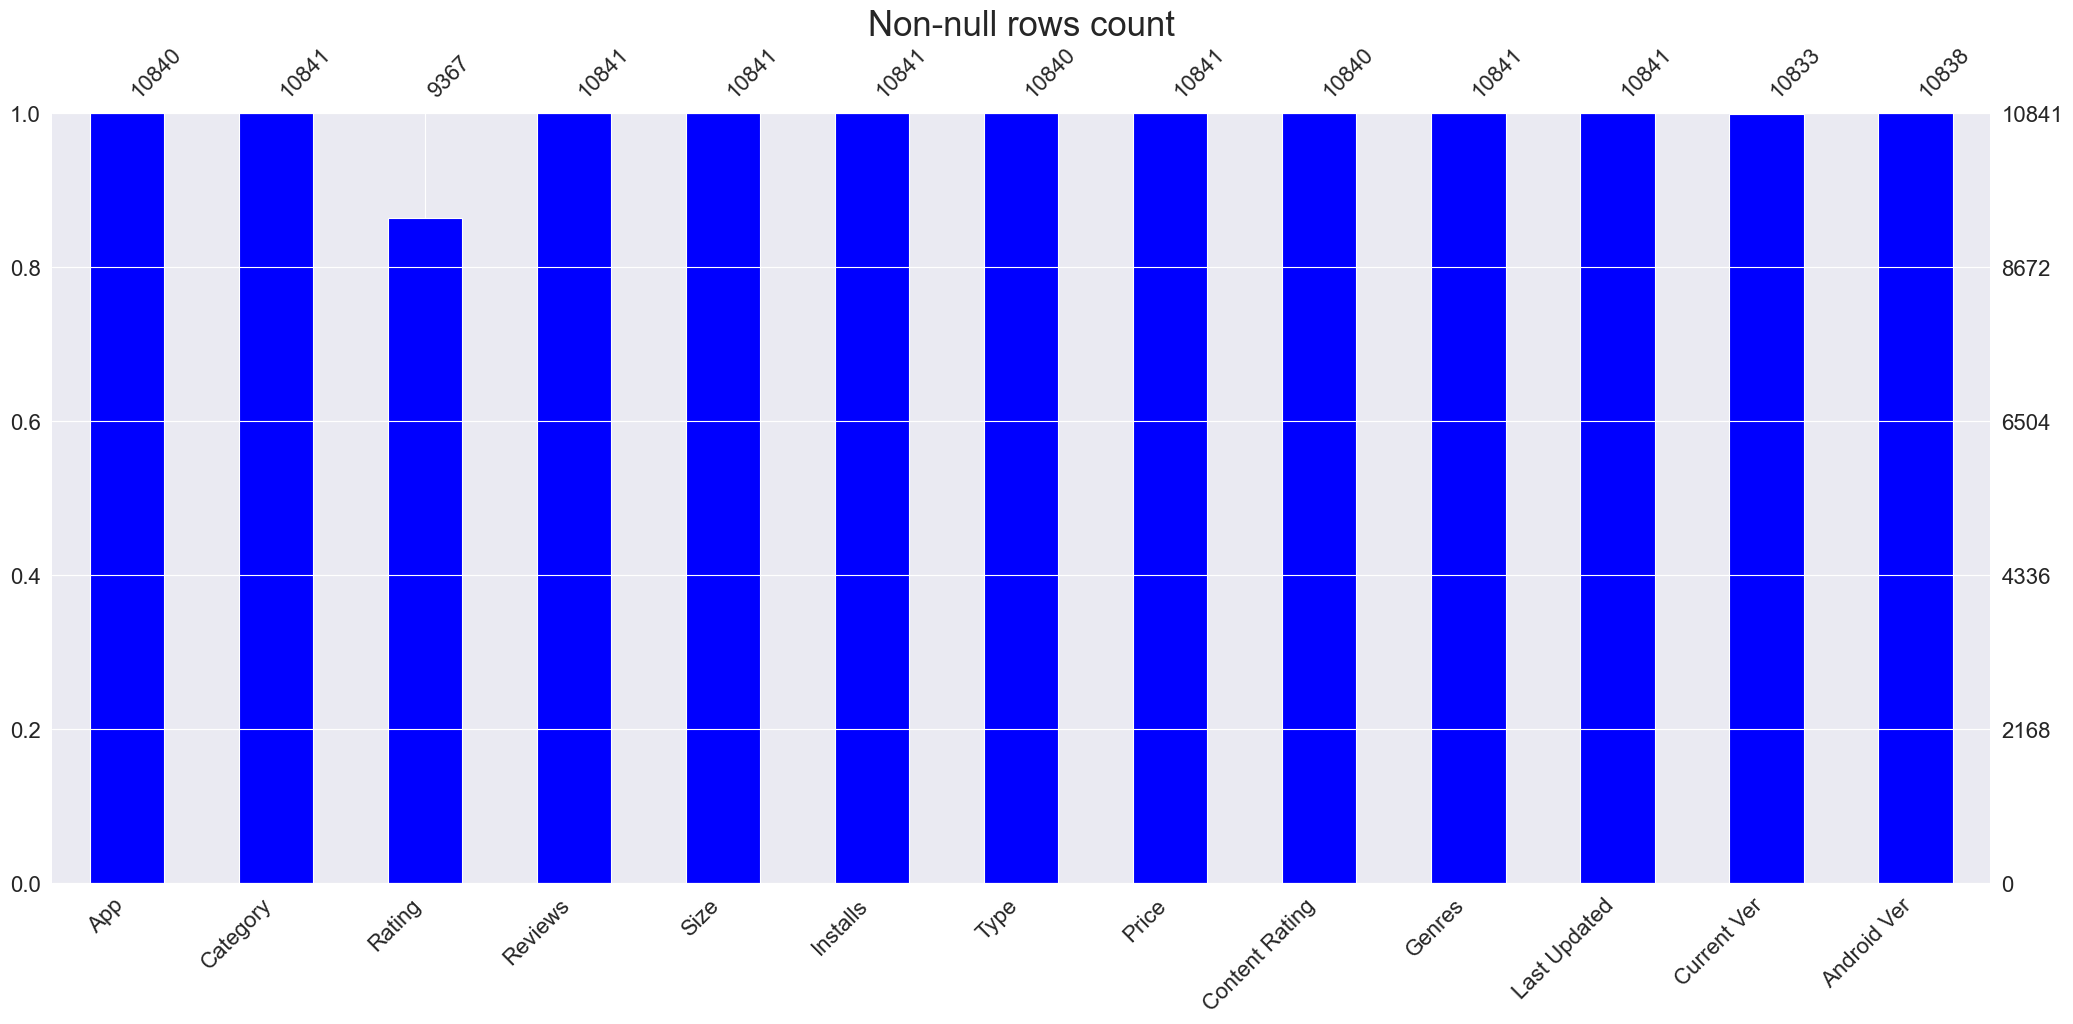

In [133]:
#Missing Values
fig = msn.bar(df=df, color='Blue')
fig.set_title('Non-null rows count', fontdict= {'fontsize': 25})
plt.show()

In [134]:
df.isna().sum()

App                  1
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [135]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [136]:
df.shape

(8885, 13)

In [137]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [138]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [139]:
df['Reviews'].unique()

array([159, 967, 87510, ..., 603, 1195, 398307], dtype=object)

In [140]:
df['Reviews'] = df['Reviews'].astype('int')
df['Reviews'].dtype

dtype('int32')

In [141]:
df['Size'][0]

'19M'

In [142]:
def size_prep(size):
    size = size.strip()
    
    if 'M' in size: # Size in Megabytes
            size = size.replace('M', '')
            size = float(size)

    elif 'k' in size: # Size in Kilobytes
        size = size.replace('k', '')
        size = float(size)
        size /= 1024  # 1 Megabyte = 1024 Kilobytes
    
    elif size == 'Varies with device': # 'Varies with device' is represented by the value 0
        size = float(0)
    
    return size

In [143]:
df['Size'] = df['Size'].map(size_prep)
df['Size'].dtype

dtype('float64')

In [144]:
def installs_prep(installs):
    installs = installs.replace(',', '')
    installs = installs.replace('+', '').strip()
    return int(installs)

In [145]:
df['Installs'] = df['Installs'].map(installs_prep)
df['Installs'].dtype

dtype('int64')

In [146]:
df['Price'].unique()

array([0, '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [147]:
def price_prep(price):
    if isinstance(price, str):
        return float(0) if price == '0' else float(price[1:])
    else:
        return float(price)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8885 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8885 non-null   object 
 1   Category        8885 non-null   object 
 2   Rating          8885 non-null   float64
 3   Reviews         8885 non-null   int32  
 4   Size            8885 non-null   float64
 5   Installs        8885 non-null   int64  
 6   Type            8885 non-null   object 
 7   Price           8885 non-null   object 
 8   Content Rating  8885 non-null   object 
 9   Genres          8885 non-null   object 
 10  Last Updated    8885 non-null   object 
 11  Current Ver     8885 non-null   object 
 12  Android Ver     8885 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 1.2+ MB


In [149]:
df['Price'] = df['Price'].map(price_prep)
df['Price'].dtype

dtype('float64')

In [150]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

df['Last Updated Year'] = df['Last Updated'].apply(lambda d: int(d.strftime('%Y')))

df['Last Updated Month'] = df['Last Updated'].apply(lambda d: int(d.strftime('%m')))

In [151]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [152]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [153]:
def android_ver_prep(android_ver):
    android_ver = android_ver.strip()
    
    if android_ver == 'Varies with device': # When the version is 'Varies with device'
        android_ver = float(0)
    else:
        android_ver = float(android_ver[:3])
    return android_ver

In [154]:
df['Android Ver'] = df['Android Ver'].map(android_ver_prep)
df['Android Ver'].dtype

dtype('float64')

In [155]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,2018,1
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018,6


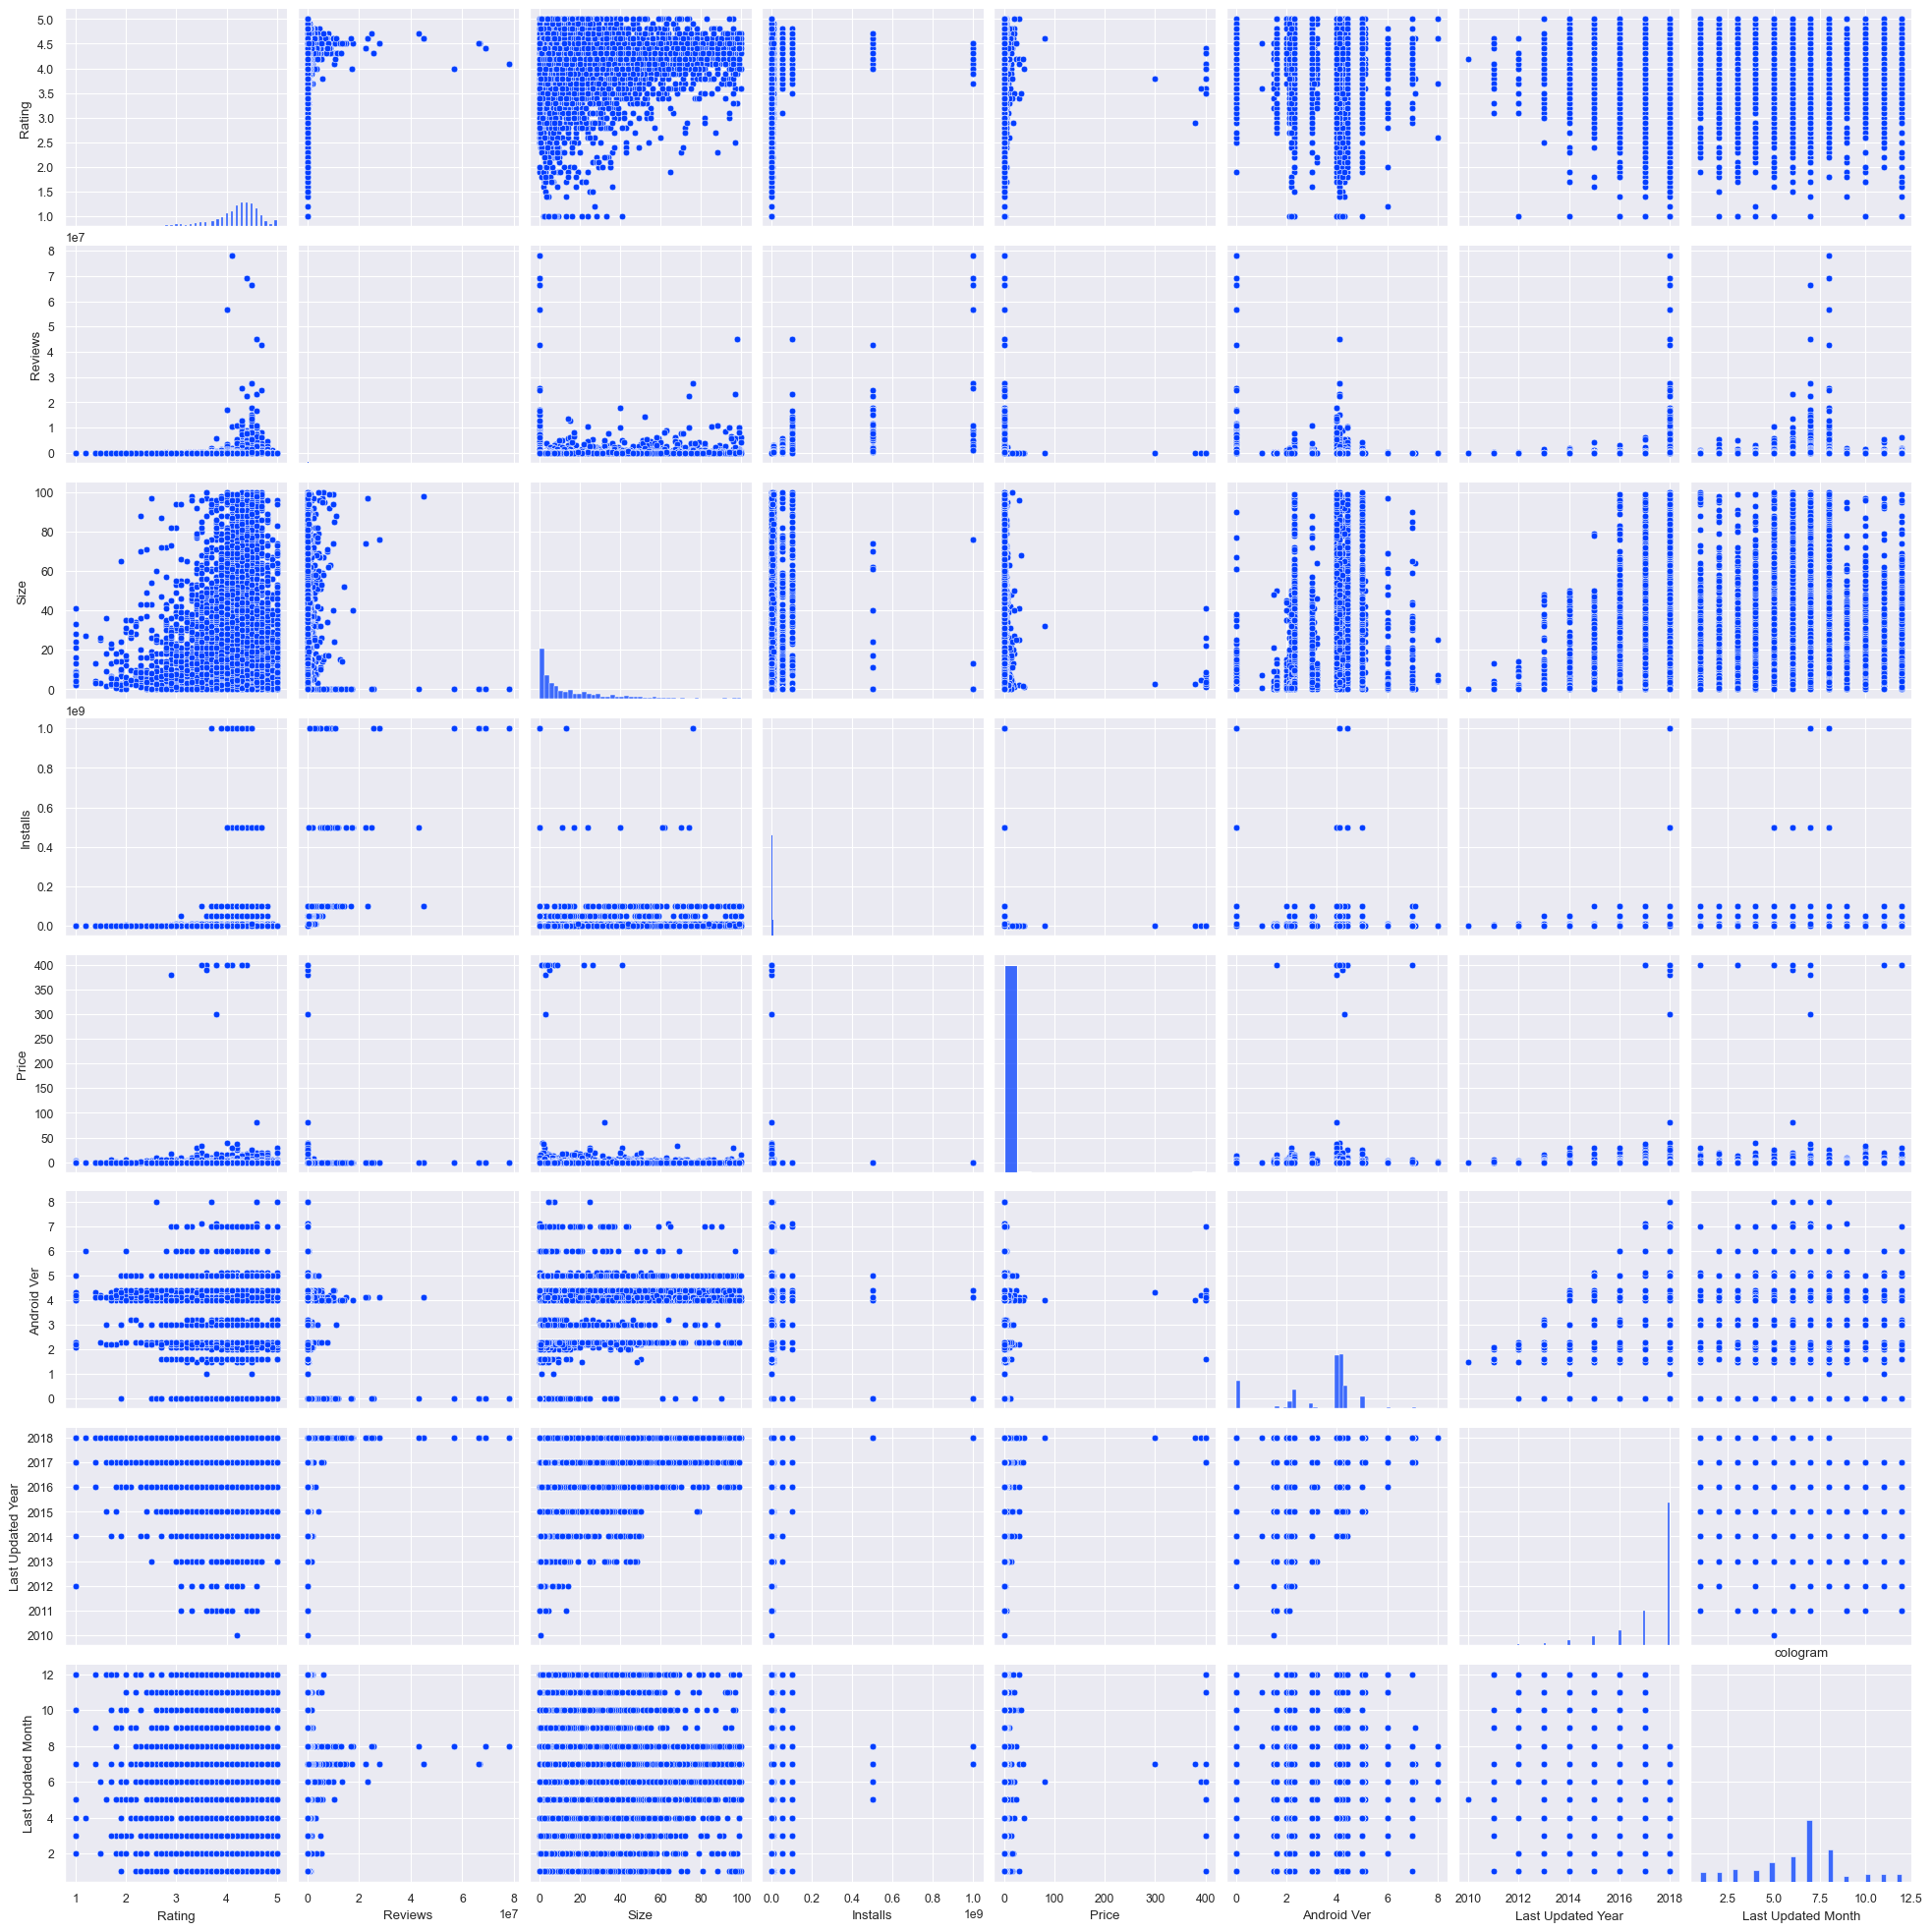

In [156]:
#EDA and Visualization
sns.pairplot(df)
plt.title('cologram')
plt.show()

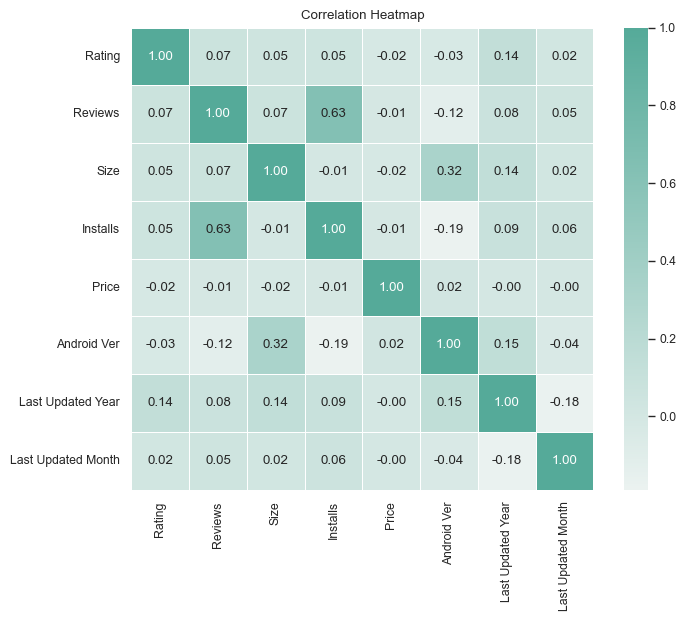

In [157]:
fig, axes = plt.subplots(figsize=(8, 6))

sns.heatmap(data=df.select_dtypes(include='number').corr(),
            annot=True, linewidths=.5, fmt='.2f',
            cmap=sns.color_palette('light:#5A9', as_cmap=True),
            square=True)

plt.title('Correlation Heatmap')
plt.show()

In [158]:
count = 0
col_names = df.select_dtypes(include='number').columns

fig = make_subplots(
    rows=2,
    cols=4,
    subplot_titles=col_names,
)

for row in range(1, 3):
    for col in range(1, 5):
        box = go.Box(y=df[col_names[count]])
        fig.add_trace(box, row=row, col=col)
        count += 1

fig.update_layout(height=800, width=1000, title_text='Box and Whisker Plots', showlegend=False)
fig.show()

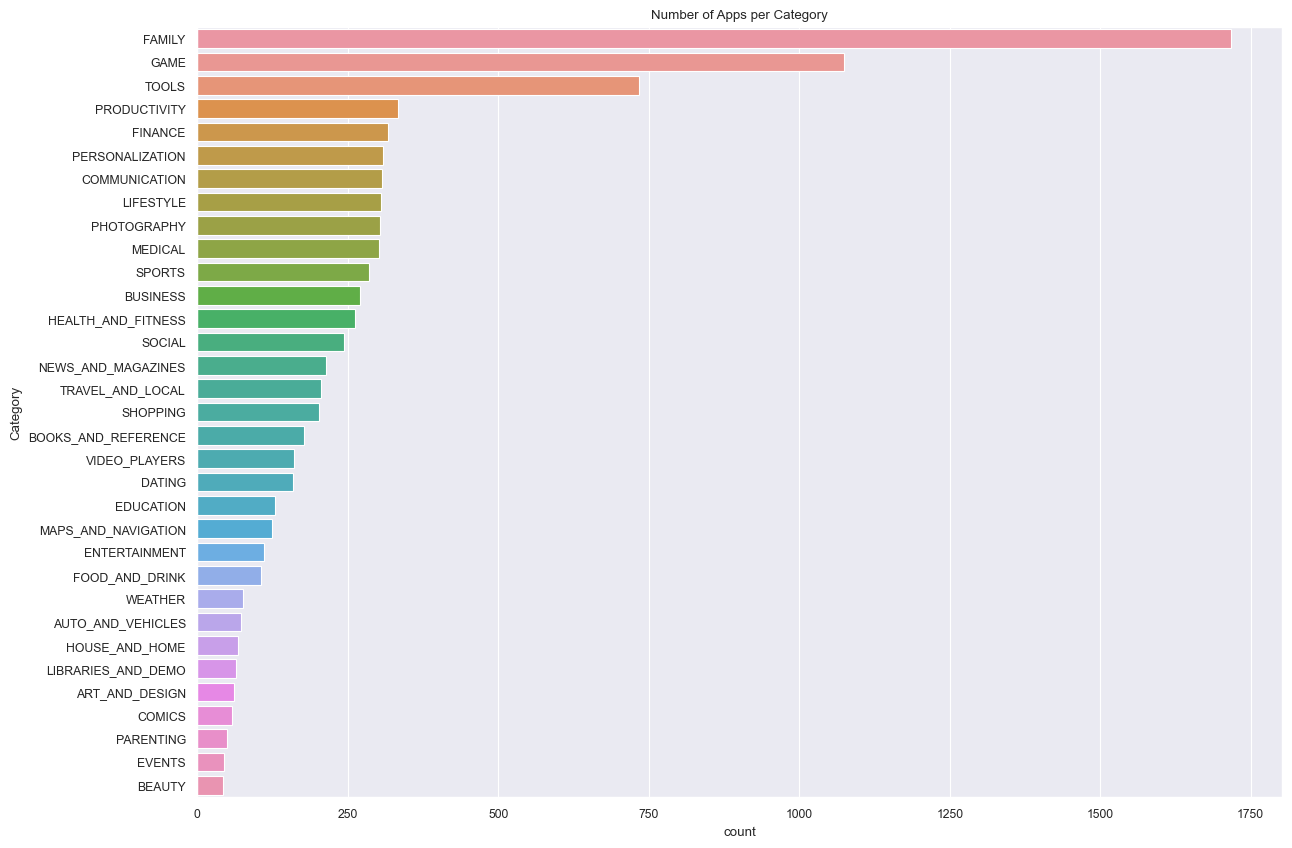

In [159]:
plt.figure(figsize=(14, 10))

sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)

plt.title('Number of Apps per Category')
plt.show()

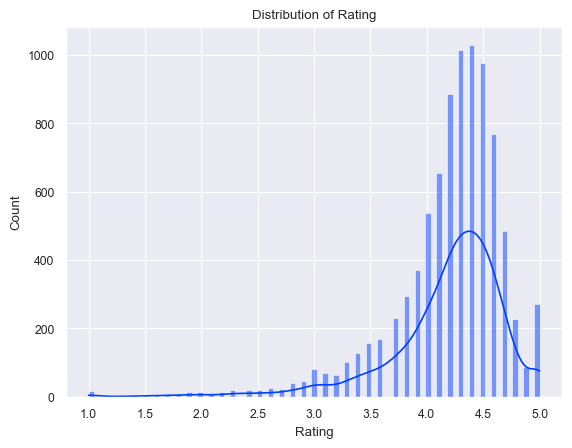

In [160]:
sns.histplot(data=df, x='Rating', kde=True)

plt.title('Distribution of Rating')
plt.show()

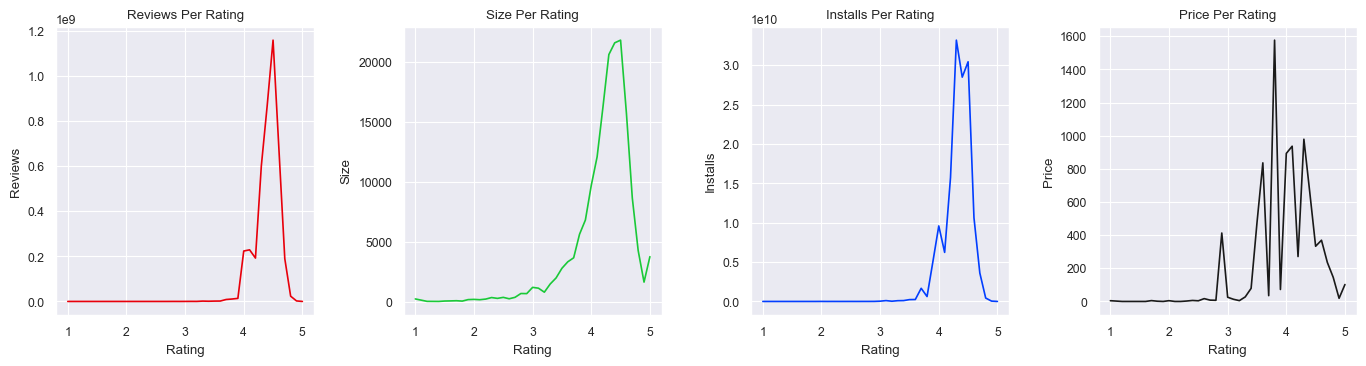

In [161]:
groupby_rating_sum = df.drop(['Last Updated', 'Last Updated Year', 'Last Updated Month'], axis=1).groupby('Rating').sum().reset_index()

cols = ['Reviews', 'Size', 'Installs', 'Price']
color = ['r', 'g', 'b', 'k']
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

for ax, col, color in zip(axs, cols, color):
    sns.lineplot(ax=ax, data=groupby_rating_sum, x='Rating', y=col, color=color)
    ax.set_xlabel('Rating')
    ax.set_ylabel(col)
    ax.set_title(f'{col} Per Rating')

fig.tight_layout(pad=2)
plt.show()

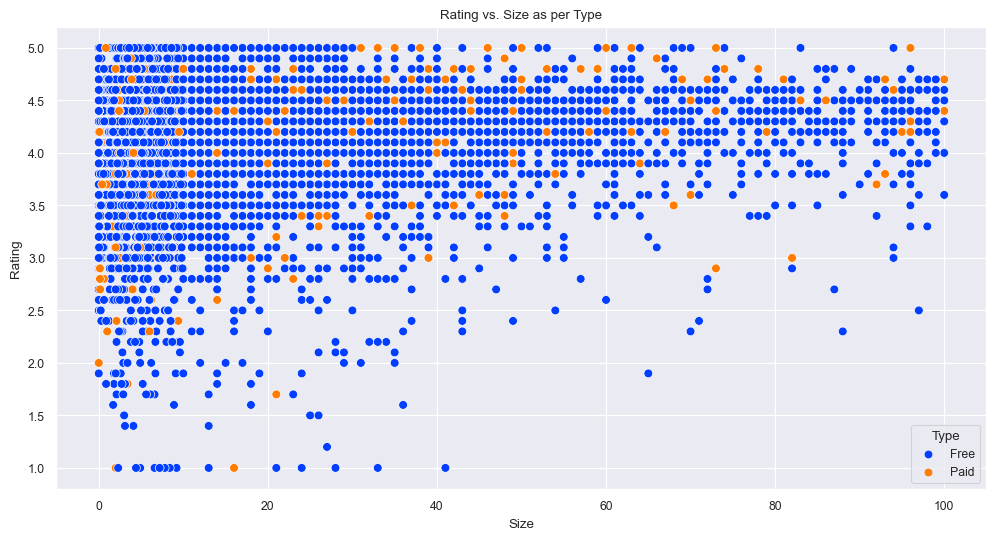

In [162]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Size', y='Rating', hue='Type', s=40)

plt.title('Rating vs. Size as per Type')
plt.show()

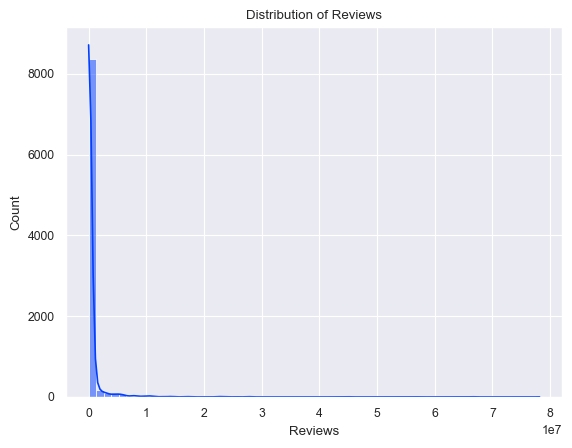

In [163]:
sns.histplot(data=df, x='Reviews', bins=60, kde=True)

plt.title('Distribution of Reviews')
plt.show()

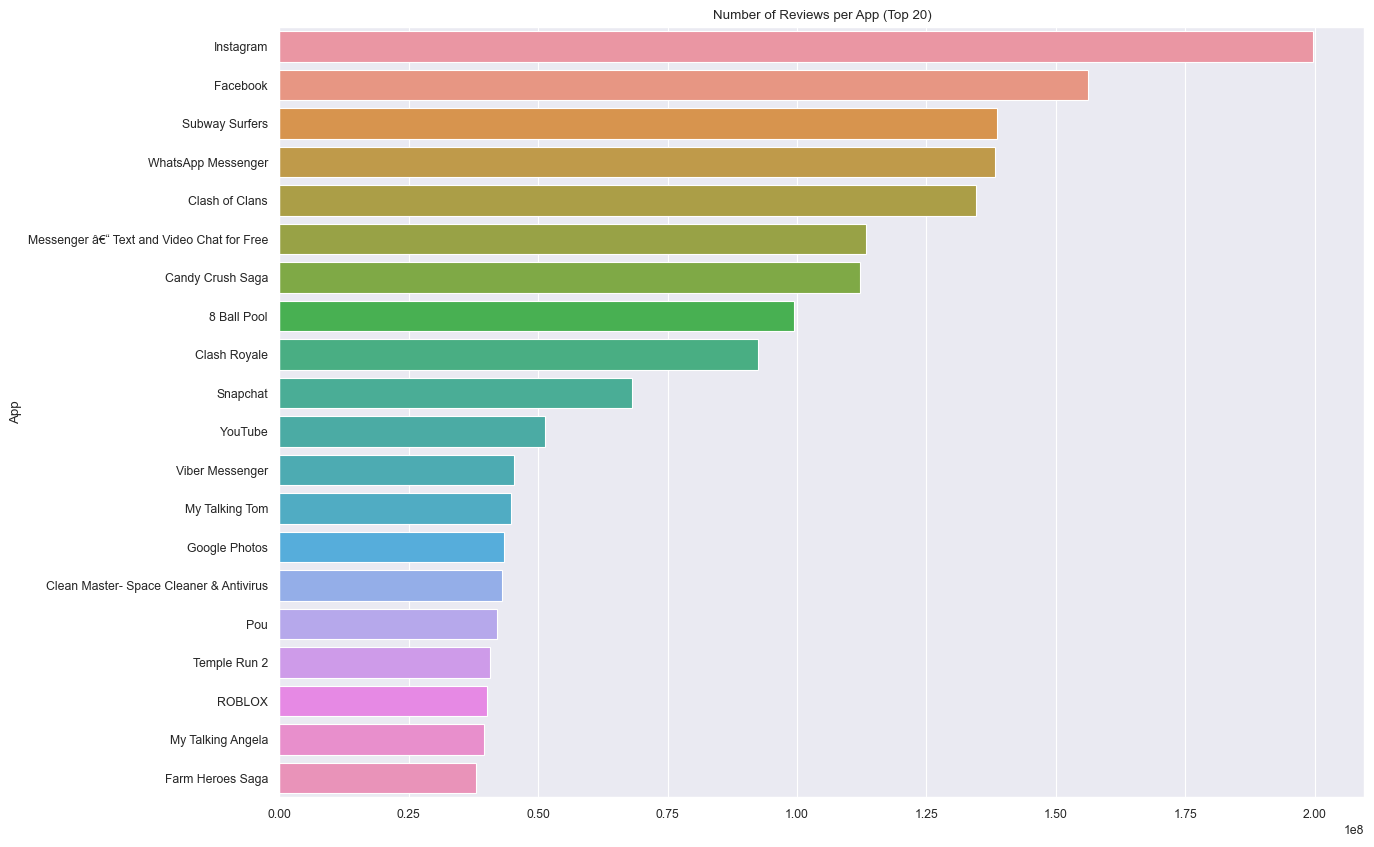

In [164]:
total_reviews_per_app_desc = df.drop(['Last Updated', 'Last Updated Year', 'Last Updated Month'], axis=1).groupby(['App'])['Reviews'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 10))

sns.barplot(x=total_reviews_per_app_desc.head(20).values, y=total_reviews_per_app_desc.head(20).index)

plt.title('Number of Reviews per App (Top 20)')
plt.show()

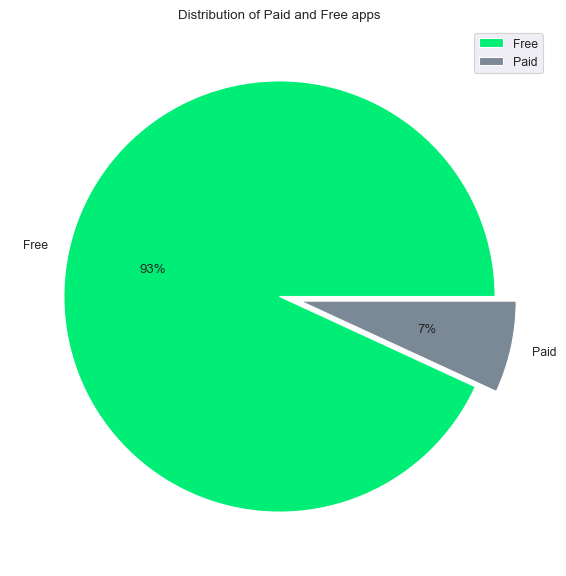

In [165]:
colors = ["#00EE76","#7B8895"]
plt.figure(figsize=(7, 7))

plt.pie(x=df['Type'].value_counts(), labels=['Free', 'Paid'], colors=colors, autopct='%.0f%%', explode=(0, 0.1))

plt.title('Distribution of Paid and Free apps')
plt.legend()
plt.show()

In [166]:
data = df['Content Rating'].value_counts().reset_index()

In [167]:
fig = px.pie(values=data.iloc[:, 1],
             names=data.iloc[:, 0],
             title='Pie chart of App Content Rating',
             width=800, height=600)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

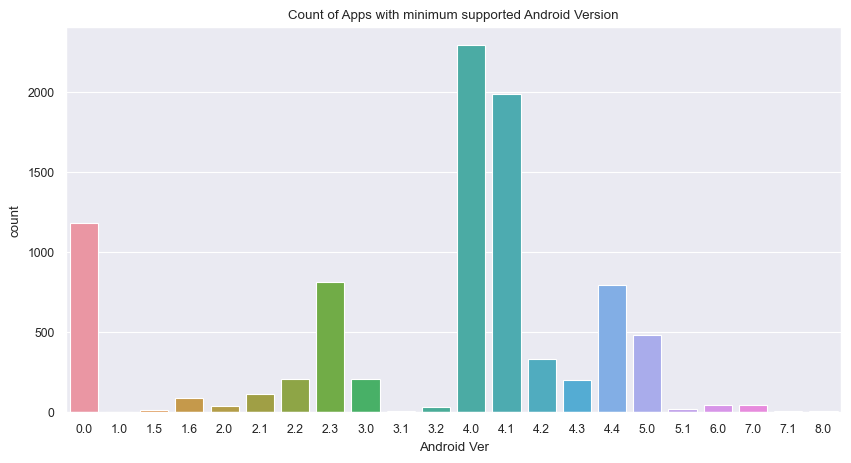

In [168]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df, x='Android Ver')

plt.title('Count of Apps with minimum supported Android Version')
plt.show()

In [169]:
groupby_year_free_count = df[df['Type'] == 'Free'].drop(['Last Updated'], axis=1).groupby('Last Updated Year')['Last Updated Year'].count()
groupby_year_paid_count = df[df['Type'] == 'Paid'].drop(['Last Updated'], axis=1).groupby('Last Updated Year')['Last Updated Year'].count()

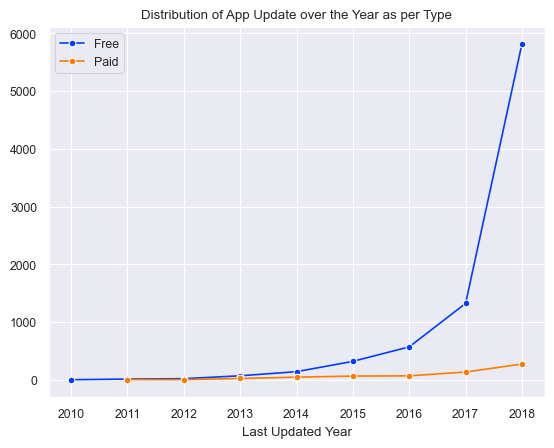

In [170]:
sns.lineplot(x=groupby_year_free_count.index,
             y=groupby_year_free_count.values,
             marker='o', label='Free')

sns.lineplot(x=groupby_year_paid_count.index,
             y=groupby_year_paid_count.values,
             marker='o', label='Paid')

plt.title('Distribution of App Update over the Year as per Type')
plt.legend()
plt.show()

In [171]:
groupby_month_free_count = df[df['Type'] == 'Free'].drop(['Last Updated'], axis=1).groupby('Last Updated Month')['Last Updated Month'].count()
groupby_month_paid_count = df[df['Type'] == 'Paid'].drop(['Last Updated'], axis=1).groupby('Last Updated Month')['Last Updated Month'].count()

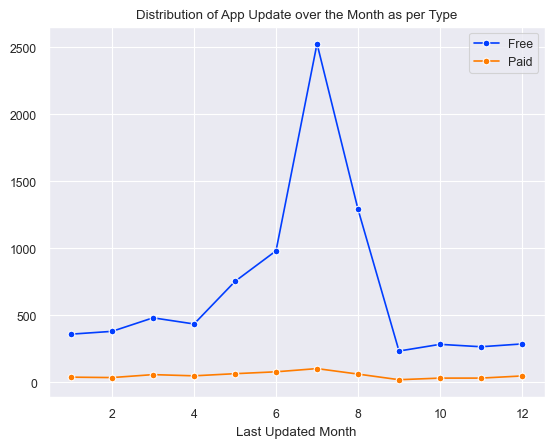

In [172]:
sns.lineplot(x=groupby_month_free_count.index,
             y=groupby_month_free_count.values,
             marker='o', label='Free')

sns.lineplot(x=groupby_month_paid_count.index,
             y=groupby_month_paid_count.values,
             marker='o', label='Paid')

plt.title('Distribution of App Update over the Month as per Type')
plt.legend()
plt.show()

In [173]:
df_rating_5 = df[df.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 271 apps having rating of 5.0


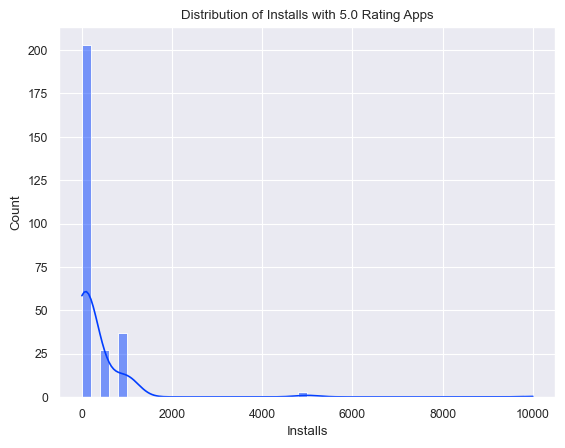

In [174]:
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()

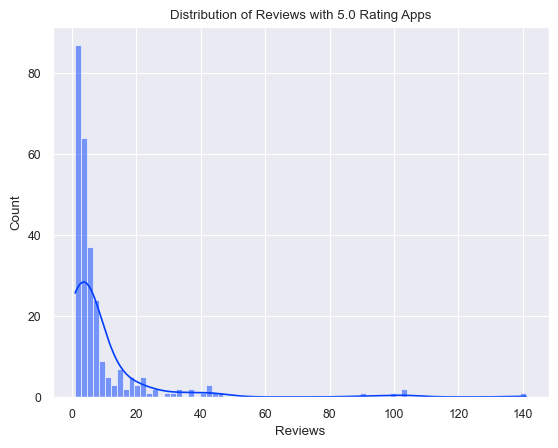

In [175]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()

In [176]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

In [177]:
fig = px.pie(values=df_rating_5_cat.iloc[:, 1],
             names=df_rating_5_cat.iloc[:, 0],
             title='Pie chart of App Categories with 5.0 Rating',
             width=800, height=600)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [178]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

In [179]:
fig = px.pie(values=df_rating_5_type.iloc[:, 1],
             names=df_rating_5_type.iloc[:, 0],
             title='Pie chart of App Types with 5.0 Rating',
             color_discrete_sequence=["#00EE76","#7B8895"],
             width=800, height=600)

fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0, 0.1])
fig.show()

In [180]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated Year,Last Updated Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,2018,1
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018,6


In [181]:
pruned_features = ['App', 'Genres', 'Last Updated', 'Current Ver']

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8885 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 8885 non-null   object        
 1   Category            8885 non-null   object        
 2   Rating              8885 non-null   float64       
 3   Reviews             8885 non-null   int32         
 4   Size                8885 non-null   float64       
 5   Installs            8885 non-null   int64         
 6   Type                8885 non-null   object        
 7   Price               8885 non-null   float64       
 8   Content Rating      8885 non-null   object        
 9   Genres              8885 non-null   object        
 10  Last Updated        8885 non-null   datetime64[ns]
 11  Current Ver         8885 non-null   object        
 12  Android Ver         8885 non-null   float64       
 13  Last Updated Year   8885 non-null   int64      

In [183]:
target = 'Rating'

In [184]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [186]:
#Label Encoding
le_dict = defaultdict()

In [187]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.fit_transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features



In [188]:
categorical_features = features_to_encode + ['Last Updated Month']
X_train['Last Updated Month'] = X_train['Last Updated Month'].astype('category')
X_test['Last Updated Month'] = X_test['Last Updated Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [189]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Android Ver',
       'Last Updated Year'],
      dtype='object')

In [190]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

In [191]:
# Modeling#Regression
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [192]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

In [194]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [195]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [196]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [197]:
#KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [198]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [199]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [200]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [201]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [202]:
#Regression evaluation
# Rounding the values
df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.511
                      MAE     0.356
                      R2      0.035
              test    RMSE    0.525
                      MAE     0.364
                      R2      0.025
KNN           train   RMSE    0.434
                      MAE     0.300
                      R2      0.303
              test    RMSE    0.550
                      MAE     0.384
                      R2     -0.070
Random Forest train   RMSE    0.499
                      MAE     0.347
                      R2      0.080
              test    RMSE    0.512
                      MAE     0.352
                      R2      0.072

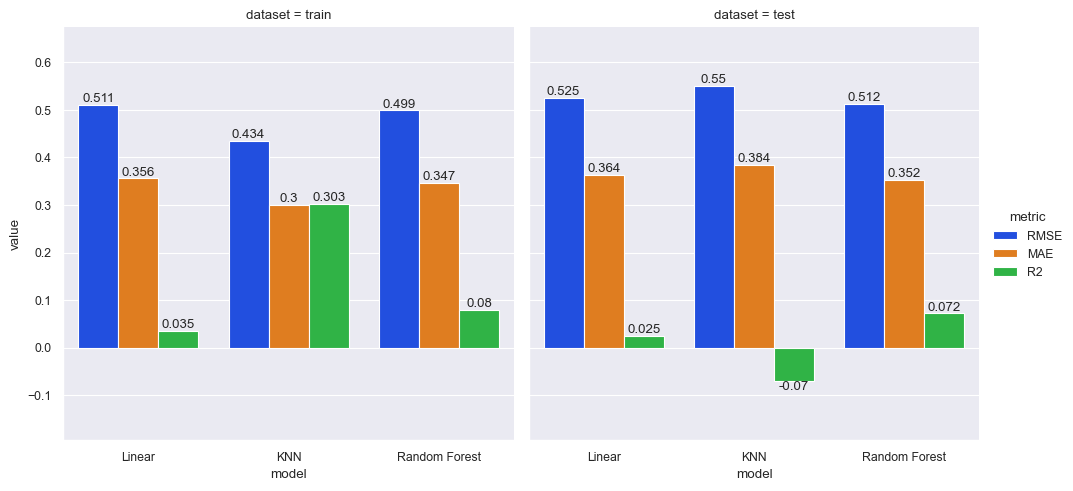

In [203]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

In [204]:
#Classification
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [205]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [206]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

In [207]:
#logictis classifer
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

In [208]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

In [209]:
#k nerast neighbour
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

In [210]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

In [211]:
#random forest classifer
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [212]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

In [213]:
#Classification Evaluation
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         75.14
                    test          74.73
KNN                 train         78.31
                    test          70.74
Random Forest       train        100.00
                    test          76.42

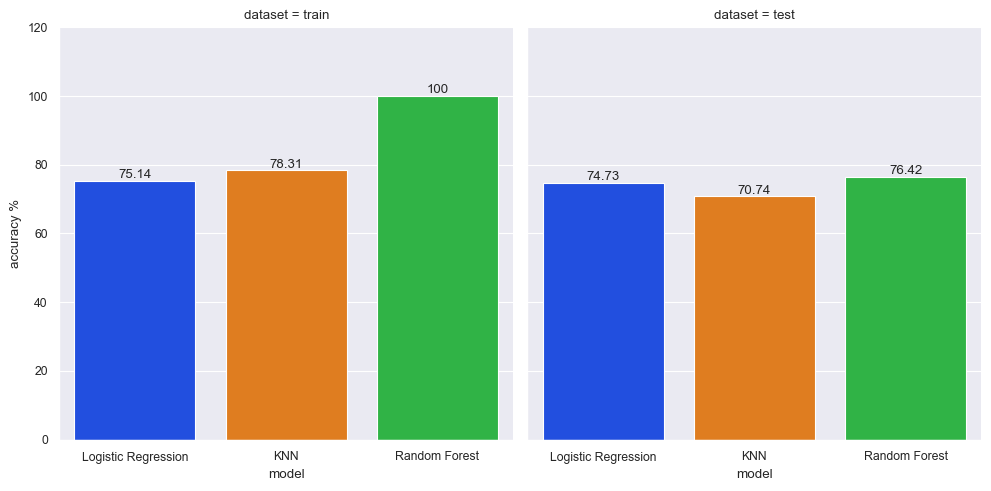

In [217]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()